In [2]:
# 加载画图包
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns

# 设置全局字体
font_dirs = ["/public/home/mowp/test/fonts/"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
plt.rcParams["font.family"] = "Arial"
plt.rcParams['font.size'] = 12
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
import numpy as np
import pandas as pd

In [4]:
%load_ext autoreload
%autoreload 1

In [5]:
import sys
sys.path.append('/public1/mowp/workspace/nanopore_modification/scripts/')
%aimport utils

In [6]:
infile = '/data/Zhaijx/mowp/db/col-CEN/bed/tel_region.bed'
tel_region = {}
with open(infile) as f:
    for line in f:
        line = line.strip().split('\t')
        tel_region[line[3]] = (line[0], int(line[1]), int(line[2]))

In [ ]:
infile = '/data/Zhaijx/mowp/db/col-CEN/bed/subtel_region.bed'
subtel_region = {}
with open(infile) as f:
    for line in f:
        line = line.strip().split('\t')
        subtel_region[line[0]] = (int(line[1]), int(line[2]))

In [10]:
infile = '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/5mc_results/20221029_col_m6A.CG_genome_pos.tsv.gz'
# infile = '/data/Zhaijx/mowp/data/stam_seq_col_CEN/20221029_col_m6A/5mc_results/20221029_col_m6A.C_genome_pos.tsv.gz'
data = None
for tel in subtel_region:
    if tel == 'Tel4R':
        continue
    extend = 8000
    if tel[-1] == 'L':
        chorm = tel_region[tel][0]
        start = tel_region[tel][1] - 1
        end = tel_region[tel][1] + extend
        start_before = tel_region[tel][2]
        end_after = None
        left_span = False
        right_span = True
    else:
        chorm = tel_region[tel][0]
        start = tel_region[tel][2] - extend
        end = tel_region[tel][2]
        end_after = tel_region[tel][1]
        start_before = None
        left_span = True
        right_span = False

    sub_start = subtel_region[tel][0]
    sub_end = subtel_region[tel][1]
    
    wt1029_methy_tl = utils.subtel_methy_tl(
        infile, chorm, start, end,
        sub_start, sub_end,
        left_span=left_span, right_span=right_span, start_before=start_before, end_after=end_after)
    wt1029_methy_tl = pd.DataFrame(wt1029_methy_tl, columns=['read_id', 'ratio', 'tel_len', 'methylated_n', 'all_n'])
    wt1029_methy_tl['tel'] = tel
    if tel[-1] == 'L':
        wt1029_methy_tl['pos'] = 'L'
    else:
        wt1029_methy_tl['pos'] = 'R'
    if data is None:
        data = wt1029_methy_tl
    else:
        data = pd.concat([data, wt1029_methy_tl], axis=0)

/public/home/mowp/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:582: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/public/home/mowp/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:582: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


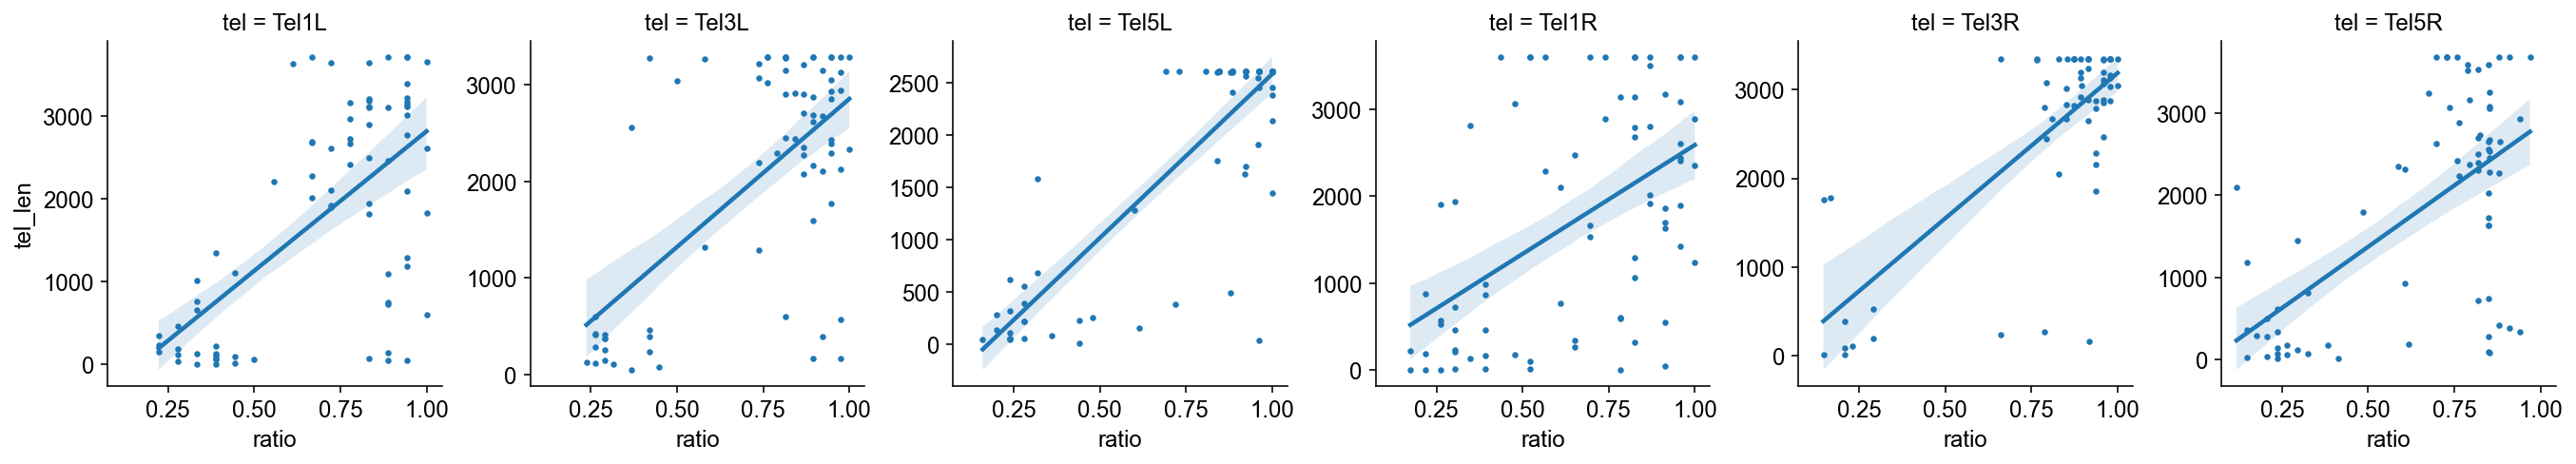

In [11]:
ax = sns.lmplot(
    data=data.sort_values(['pos', 'tel']), x="ratio", y="tel_len",
    col='tel', height=3.5, aspect=.9,
    scatter_kws={"s": 5, "alpha": 1},
    sharey=False, sharex=True,
)
# plt.xlabel('mCG')

In [13]:
data.groupby('tel')[['ratio','tel_len']].corr()

ratio   tel_len
tel                              
Tel1L ratio    1.000000  0.634734
      tel_len  0.634734  1.000000
Tel1R ratio    1.000000  0.506778
      tel_len  0.506778  1.000000
Tel3L ratio    1.000000  0.648631
      tel_len  0.648631  1.000000
Tel3R ratio    1.000000  0.756892
      tel_len  0.756892  1.000000
Tel5L ratio    1.000000  0.844706
      tel_len  0.844706  1.000000
Tel5R ratio    1.000000  0.614888
      tel_len  0.614888  1.000000